In [17]:
from graphviz import Digraph
import heapq
from copy import deepcopy
import numpy as np
import random
import time

In [10]:
class Node:
  def __init__(self, state, action = None, parent = None):
    self.state = state
    self.id = str(self)
    self.action = action
    self.parent = parent

  def __str__(self):
    state = self.state
    res = ""
    for row in state:
      for col in row:
        if col == 0:
          col = '_'
        res += str(col)
      res+= '\n'
    return res[:len(res)-1]

  def get_successors(self):
    successors = []
    for action in ['L','R','U','D']:
      succ = self.get_successor(action, deepcopy(self.state))
      if succ is not None and str(succ) != str(self.parent):
        successors.append(Node(succ,action,self))
    return successors

  def get_successor(self, action, state):
    pi, pj = self.get_blank_pos(state)
    pi, pj = self.get_dest_pos(action, pi, pj)
    if 0 <= pi and pi < 3 and 0 <= pj and pj < 3:
      if action == 'L':
        state[pi][pj - 1] = state[pi][pj]
      if action == 'R':
        state[pi][pj + 1] = state[pi][pj]
      if action == 'U':
        state[pi-1][pj] = state[pi][pj]
      if action == 'D':
        state[pi+1][pj] = state[pi][pj]
      state[pi][pj] = 0
      return state
    return None

  def get_dest_pos(self, action, pi, pj):
    if action == 'L':
      pj += 1
    if action == 'R':
      pj -= 1
    if action == 'U':
      pi += 1
    if action == 'D':
      pi -= 1
    return pi, pj

  def get_blank_pos(self, state):
    for i in range(3):
      for j in range(3):
        if state[i][j] == 0:
          return i,j

  def get_action(self):
    return self.action

  def get_id(self):
    return self.id

  def get_node_str(self):
    return str(self)

  def draw(self, dot):
    dot.node(self.get_id(), self.get_node_str())
    if self.parent is not None:
      dot.edge(self.parent.get_id(), self.get_id(), self.get_action())

  def __lt__(self,other):
    return self.id < other.id

In [14]:
class Astar:

  def __init__(self, n: Node):
    self.n = n
    self.goal_state = [[[1, 2, 3],
                        [4, 5, 6],
                        [7, 8, 0]],
                        [[0, 1, 2],
                        [3, 4, 5],
                        [6, 7, 8]]]

  def search(self):
    path = []
    frontier = []
    explored = set()
    parent = dict()
    h = self.get_h(self.n.state)
    heapq.heappush(frontier,(h,self.n))
    while len(frontier) > 0:
      h, child_node = heapq.heappop(frontier)
      if h == 0:
        path = self.get_path(self.n, child_node,parent)
        break
      explored.add(str(child_node))
      succ = child_node.get_successors()
      for s in succ:
        hs = self.get_h(s.state)
        if str(s) not in explored and (hs,s) not in frontier:
          heapq.heappush(frontier, (hs,s))
          parent[s] = child_node
    cost = len(explored)
    return path, cost

  def get_h(self, state):
    goal_state_1 = np.array(self.goal_state[0])
    goal_state_2 = np.array(self.goal_state[1])
    h1 = np.count_nonzero(state != goal_state_1)
    h2 = np.count_nonzero(state != goal_state_2)
    h = min(h1,h2)
    return h

  def get_path(self, src: Node, dst: Node, parent):
    path = []
    while src.state.tolist() != dst.state.tolist():
      path.append(dst)
      dst = parent[dst]
    path.append(dst)
    path.reverse
    return path

  def display(self):
    dot = Digraph()
    path, cost = self.search()
    actions = []
    if len(path) > 0:
      for n in path:
        n.draw(dot)
        actions.append(n.action)
      actions.reverse()
      actions.pop(0)
    else:
      print("no solution with A*")
    return dot, actions if actions is not None else None ,cost

In [ ]:
class Solve_BFS:
  def __init__(self):
    self.reachGoal = False
    self.goalTest = {'123\n456\n78_','_12\n345\n678'}

  def BFS(self, node,draw):
    dot = Digraph()
    frontier = list()
    explored = set()
    infront = set()
    path = []
    actions = []
    total_cost = 0
    frontier.append(node)

    if str(node) in self.goalTest and draw:
      node.draw(dot)
      return dot, actions, total_cost

    while len(frontier) > 0 and self.reachGoal == False:
      size = len(frontier)
      for i in range(size):
        n = frontier.pop(0)
        total_cost += 1
        explored.add(str(n))
        expand(self, n, explored, frontier, infront, path, dot)
        if self.reachGoal:
          break

    if self.reachGoal:
      findPath(path,node)
      if draw:
        actions= solve(path,dot, actions)
    else:
      print("No solutions with BFS")
    return dot, actions, total_cost

def expand(self, n, explored, frontier, infront, path, dot):
  successors = n.get_successors()
  for s in successors:
    if str(s) not in explored:
      # reach goal test
      if str(s) in self.goalTest:
        self.reachGoal = True
        path.append(s)
        path.append(n)
        return
      # prevent case 2 nodes have the same children
      if str(s) not in infront:
        infront.add(str(s))
        frontier.append(s)

def findPath(path, node):
  check_node = path[len(path) -1]
  while(str(check_node) != str(node)):
    check_node = check_node.parent
    path.append(check_node)
  path.append(node)

def solve(path,dot, actions):
  last = len(path) -2
  while len(path) > 1:
    n = path.pop(last)
    last-=1
    n.draw(dot)
    actions.append(n.get_action())
  return actions

chose algorithm:(BFS or A*)
A*
chose your start state:
123405678
using A*, cost: 94
actions:  ['L', 'U', 'R', 'R', 'D', 'L', 'U', 'L', 'D', 'R', 'R', 'U', 'L', 'L']


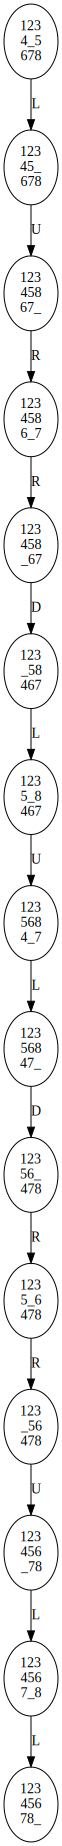

In [21]:
def createNode(inp):
  i = 0
  matrix = []
  for row in range(3):
    row = []
    for col in range(3):
      row.append(int(inp[i]))
      i+=1
    matrix.append(row)
  matrix = np.reshape(matrix, (3,3))
  return Node(matrix)

print("chose algorithm:(BFS or A*)")
algorithm = input()
print("chose your start state:")
n = createNode(input())

if algorithm == "BFS":
  solver = Solve_BFS()
  dot, actions, cost = solver.BFS(n,True)
  print("using BFS, cost: ",cost)
  print("actions: ", actions)
else:
  astar = Astar(n)
  dot, actions ,cost = astar.display()
  print("using A*, cost:", cost)
  print('actions: ', actions)

dot

# input format : 'xxxxxxxxx' x is number in [0,8] and x is not duplicate
# Example of input
# 123405678 solvable
# 127468053 solvable
# 812043765 not solvable

In [15]:
# random
import numpy as np

def getInvCount(arr):
    inv_count = 0
    empty_value = 0
    for i in range(0, 9):
        for j in range(i + 1, 9):
            if arr[j] != empty_value and arr[i] != empty_value and arr[i] > arr[j]:
                inv_count += 1
    return inv_count

# This function returns true
# if given 8 puzzle is solvable.
def isSolvable(puzzle) :
    # Count inversions in given 8 puzzle
    inv_count = getInvCount([j for sub in puzzle for j in sub])
    # return true if inversion count is even.
    return (inv_count % 2 == 0)

def randomNode():
  # Create a list of integers from 0 to 8
  values = list(range(9))
  # Shuffle the list randomly
  np.random.shuffle(values)
  # Reshape the shuffled list into a 3x3 matrix
  i =0
  matrix = []
  for row in range(3):
    row = []
    for col in range(3):
      row.append(values[i])
      i+=1
    matrix.append(row)
  matrix = np.reshape(matrix, (3,3))
  return Node(matrix)

total_cost_BFS = 0
total_cost_A_star = 0
# number of node is solvable
count = 0

total_time_BFS = 0
total_time_A_star = 0

for i in range(10):
  puzzle = randomNode()
  if(isSolvable(puzzle.state)):
    # using bfs
    start_time_BFS = time.time()
    solver = Solve_BFS()
    dot , actions, cost_BFS = solver.BFS(puzzle,False)
    total_cost_BFS += cost_BFS
    end_time_BFS = time.time()
    total_time_BFS += end_time_BFS - start_time_BFS

    # using A*
    start_time_A_star = time.time()
    astar = Astar(puzzle)
    dot, actions, cost_A_star = astar.display()
    total_cost_A_star += cost_A_star
    end_time_A_star = time.time()
    total_time_A_star += end_time_A_star - start_time_A_star

    count +=1

print("BFS :total cost with ",count," case is solvable: ",total_cost_BFS/count)
print("A* :total cost with ",count," case is solvable: ",total_cost_A_star/count)


BFS :total cost with  4  case is solvable:  37053.5
A* :total cost with  4  case is solvable:  339.5


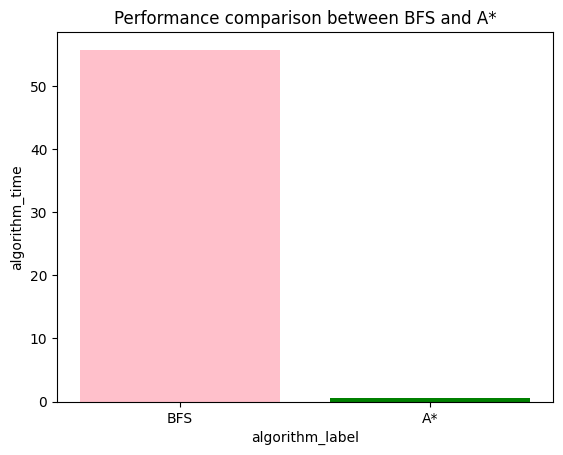

In [16]:
import matplotlib.pyplot as plt

algorithm_label = ['BFS','A*']
algorithm_time = [total_time_BFS, total_time_A_star]

plt.bar(algorithm_label, algorithm_time, color=['pink', 'green'])
plt.title('Performance comparison between BFS and A*')
plt.xlabel('algorithm_label')
plt.ylabel('algorithm_time')

plt.show()